In [1]:
# http://cs231n.github.io/python-numpy-tutorial/#numpy
# https://chrisalbon.com/python/basics/generating_random_numbers_with_numpy/

import numpy as np
import matplotlib.pyplot as plt
import time

# 1. Finding a convenient way to define a random mini-batch

In [2]:
a = np.random.random((1000, 2))

start1 = time.time()
numrows = np.size(a, 0)
numcols = np.size(a, 1)
end1 = time.time()

In [3]:
start2 = time.time()
batch_s = 10
def batches():
    i = 0
    maxp_iterations = ((numrows) / (batch_s))
    while (i <= maxp_iterations):
        a[(0 + batch_s * i):(batch_s + batch_s * i),:]
        i += 1
end2 = time.time()

[[[0.39801534 0.66582347]]

 [[0.93581567 0.73326876]]]


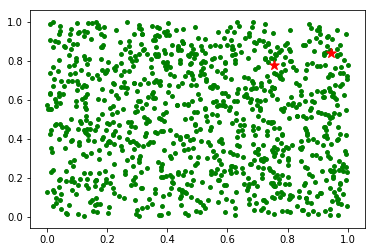

In [4]:
start3 = time.time()
f1= a[:, 0]
f2= a[:, 1]

plt.scatter(f1, f2, c='green', s=15)

X = (list(zip(f1, f2)))

# centroid initialization
k=2
c1 = np.random.choice(f1, size=k)
c2 = np.random.choice(f2, size=k)

plt.scatter(c1, c2, marker='*',c='red',s=100)

centroid_array = np.array([[np.random.choice(f1, size=k)], 
                           [np.random.choice(f2, size=k)]])
end3 = time.time()

print (centroid_array)

In [5]:
start4 = time.time()
def dist(cell_loc, cluster_number):

    return np.linalg.norm(a[cell_loc, :] - centroid_array[cluster_number - 1, :])

def assign_centroids(a_array):
    global nearest_centroid
    z = 0
    nearest_centroid = np.zeros([a_array.shape[0], 1])
    
    # Loop over all datapoints
    while z < a_array.shape[0]:
        sml_distance = -1

        # Loop over every centroid
        j = 1
        while j <= k:

            if sml_distance == -1 or dist(z, j) < sml_distance:
                sml_distance = dist(z, j)
                nearest_centroid[z, 0] = j
            j += 1
        z += 1
end4 = time.time()

In [6]:
start5 = time.time()
n_iterations = (numrows // batch_s)
v = np.zeros((k, 1))
j = 1
ctrnew = centroid_array
while (j <= n_iterations):
    
        batches = batches()
        
        assign_centroids(batches)
        z = 0
        
        while (z < batch_s):
            c = ctrnew[int(nearest_centroid[z, 0])-1, :]
            v[int((nearest_centroid[z, 0]-1)), 0] =  int(v[int((nearest_centroid[z, 0]-1)), 0]) + 1
            n = 1/v[int((nearest_centroid[z, 0]-1)), 0]
            ctrnew[int(nearest_centroid[z, 0])-1, :] = c * (1-n) + a[z, :] * n
            z+=1
        j+=1
        
centroid_array = ctrnew
assign_centroids(a)
nearest_centroid_squeeze = np.squeeze(nearest_centroid.astype(int))
print("\nMINI-BATCH:")
print("\ngroup 4_1 algorithm:")
end5 = time.time()
print((end1 - start1) + (end2 - start2) + (end3 - start3) + (end4 - start4) + (end5 - start5))

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
ctrnew

In [ ]:
c3 = ctrnew[0, :]
c4 = ctrnew[1, :]

plt.scatter(f1, f2, c='green', s=15)

X = (list(zip(f1, f2)))

plt.scatter(c3, c4, marker='*',c='red',s=100)

In [ ]:
from sklearn.cluster import MiniBatchKMeans

In [ ]:
kmeans = MiniBatchKMeans(n_clusters=k, 
                         random_state=0, 
                         batch_size=batch_s)
i = 0

while (i < n_iterations):
    kmeans = kmeans.partial_fit(a[(0 + batch_s * i):(batch_s + batch_s * i),:])
    i+=1
    
kmeans.cluster_centers_


In [ ]:
kmeans = MiniBatchKMeans(n_clusters=k, 
                         random_state=0, 
                         batch_size=batch_s,
                        max_iter=n_iterations).fit(a)
kmeans.cluster_centers_

In [ ]:
c3 = kmeans.cluster_centers_[0, :]
c4 = kmeans.cluster_centers_[1, :]

plt.scatter(f1, f2, c='green', s=15)

X = (list(zip(f1, f2)))

plt.scatter(c3, c4, marker='*',c='red',s=100)